In [ ]:
!pip install scvi-tools -U
!pip install scanpy
!pip3 install leidenalg

     |████████████████████████████████| 231 kB 12.0 MB/s 
     |████████████████████████████████| 242 kB 87.0 MB/s 
     |████████████████████████████████| 678 kB 57.4 MB/s 
     |████████████████████████████████| 127 kB 66.1 MB/s 
     |████████████████████████████████| 212 kB 88.6 MB/s 
     |████████████████████████████████| 813 kB 65.6 MB/s 
     |████████████████████████████████| 282 kB 37.3 MB/s 
     |████████████████████████████████| 125 kB 81.4 MB/s 
     |████████████████████████████████| 636 kB 62.7 MB/s 
     |████████████████████████████████| 829 kB 84.9 MB/s 
     |████████████████████████████████| 1.3 MB 77.3 MB/s 
     |████████████████████████████████| 51 kB 7.0 MB/s 
     |████████████████████████████████| 160 kB 81.2 MB/s 
     |████████████████████████████████| 271 kB 75.5 MB/s 
  Created wheel for docrep: filename=docrep-0.3.2-py3-none-any.whl size=19895 sha256=db068487c72aa00018e9af036a0d8ece27fce4c988c3269fee8f69900d6b7082
  Stored in directory: /root/.cache/pip/

In [ ]:
import numpy as np
import pandas as pd
import scanpy as sc
import sys
from statsmodels import robust
import matplotlib.pyplot as plt
import os.path
import anndata
import seaborn as sns
import matplotlib as mpl
import scvi

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Global seed set to 0
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#first cluster the complete dataset on a combined UMAP
os.chdir('/content/drive/MyDrive/jupyterdata/GCA_data/external_data/shendure')
shendure = sc.read_h5ad('shendure_raw.h5ad')

shendure = shendure[~(shendure.obs.Main_cluster_name.isnull()),:]

shendure.layers["counts"] = shendure.X.copy()

In [ ]:
#first cluster the complete dataset on a combined UMAP
os.chdir('/content/drive/MyDrive/jupyterdata/GCA_data/external_data/')
teich = sc.read_h5ad('teich_heart_raw.h5ad')

teich.layers["counts"] = teich.X.copy()

In [ ]:
teich.obs['source'] = 'teich'
shendure.obs['source'] = 'shendure'

teich.obs['anno'] = teich.obs.cell_states
shendure.obs['anno'] = shendure.obs.Main_cluster_name

shendure.obs['donor'] = shendure.obs.Batch

In [ ]:
shendure.obs.anno.cat.categories

Index(['CLC_IL5RA positive cells', 'Cardiomyocytes',
       'ELF3_AGBL2 positive cells', 'Endocardial cells',
       'Epicardial fat cells', 'Erythroblasts', 'Lymphatic endothelial cells',
       'Lymphoid cells', 'Megakaryocytes', 'Myeloid cells',
       'SATB2_LRRC7 positive cells', 'Schwann cells', 'Smooth muscle cells',
       'Stromal cells', 'Vascular endothelial cells', 'Visceral neurons'],
      dtype='object')

In [ ]:
teich.obs.anno.cat.categories

Index(['Adip1', 'Adip2', 'Adip3', 'Adip4', 'B_cells', 'CD4+T_cytox',
       'CD4+T_tem', 'CD8+T_cytox', 'CD8+T_tem', 'CD16+Mo', 'DOCK4+MØ1',
       'DOCK4+MØ2', 'EC1_cap', 'EC2_cap', 'EC3_cap', 'EC4_immune', 'EC5_art',
       'EC6_ven', 'EC7_atria', 'EC8_ln', 'EC9_FB-like', 'EC10_CMC-like', 'FB1',
       'FB2', 'FB3', 'FB4', 'FB5', 'FB6', 'FB7', 'IL17RA+Mo', 'LYVE1+MØ1',
       'LYVE1+MØ2', 'LYVE1+MØ3', 'Mast', 'Meso', 'CD14+Mo', 'Mo_pi', 'MØ_AgP',
       'MØ_mod', 'NC1', 'NC2', 'NC3', 'NC4', 'NC5', 'NC6', 'NK', 'NKT', 'NØ',
       'PC1_vent', 'PC2_atria', 'PC3_str', 'PC4_CMC-like', 'SMC1_basic',
       'SMC2_art', 'aCM1', 'aCM2', 'aCM3', 'aCM4', 'aCM5', 'doublets', 'DC',
       'nan', 'vCM1', 'vCM2', 'vCM3', 'vCM4', 'vCM5'],
      dtype='object')

In [ ]:
teich.obs.replace({'anno':'vCM1'},'Cardiomyocytes', inplace=True)
teich.obs.replace({'anno':'vCM2'},'Cardiomyocytes', inplace=True)
teich.obs.replace({'anno':'vCM3'},'Cardiomyocytes', inplace=True)
teich.obs.replace({'anno':'vCM4'},'Cardiomyocytes', inplace=True)
teich.obs.replace({'anno':'vCM5'},'Cardiomyocytes', inplace=True)

teich.obs.replace({'anno':'aCM1'},'Cardiomyocytes', inplace=True)
teich.obs.replace({'anno':'aCM2'},'Cardiomyocytes', inplace=True)
teich.obs.replace({'anno':'aCM3'},'Cardiomyocytes', inplace=True)
teich.obs.replace({'anno':'aCM4'},'Cardiomyocytes', inplace=True)
teich.obs.replace({'anno':'aCM5'},'Cardiomyocytes', inplace=True)

teich.obs.replace({'anno':'EC1_cap'},'Vascular endothelial cells', inplace=True)
teich.obs.replace({'anno':'EC2_cap'},'Vascular endothelial cells', inplace=True)
teich.obs.replace({'anno':'EC3_cap'},'Vascular endothelial cells', inplace=True)
teich.obs.replace({'anno':'EC4_immune'},'Vascular endothelial cells', inplace=True)
teich.obs.replace({'anno':'EC5_art'},'Vascular endothelial cells', inplace=True)
teich.obs.replace({'anno':'EC6_ven'},'Vascular endothelial cells', inplace=True)
teich.obs.replace({'anno':'EC7_atria'},'Vascular endothelial cells', inplace=True)
teich.obs.replace({'anno':'EC8_ln'},'Vascular endothelial cells', inplace=True)
teich.obs.replace({'anno':'EC9_FB-like'},'Vascular endothelial cells', inplace=True)
teich.obs.replace({'anno':'EC10_CMC-like'},'Vascular endothelial cells', inplace=True)

teich.obs.replace({'anno':'FB1'},'Stromal cells', inplace=True)
teich.obs.replace({'anno':'FB2'},'Stromal cells', inplace=True)
teich.obs.replace({'anno':'FB3'},'Stromal cells', inplace=True)
teich.obs.replace({'anno':'FB4'},'Stromal cells', inplace=True)
teich.obs.replace({'anno':'FB5'},'Stromal cells', inplace=True)
teich.obs.replace({'anno':'FB6'},'Stromal cells', inplace=True)
teich.obs.replace({'anno':'FB7'},'Stromal cells', inplace=True)

teich.obs.replace({'anno':'NC1'},'Visceral neurons', inplace=True)
teich.obs.replace({'anno':'NC2'},'Visceral neurons', inplace=True)
teich.obs.replace({'anno':'NC3'},'Visceral neurons', inplace=True)
teich.obs.replace({'anno':'NC4'},'Visceral neurons', inplace=True)
teich.obs.replace({'anno':'NC5'},'Visceral neurons', inplace=True)
teich.obs.replace({'anno':'NC6'},'Visceral neurons', inplace=True)

teich.obs.replace({'anno':'SMC1_basic'},'Smooth muscle cells', inplace=True)
teich.obs.replace({'anno':'SMC2_art'},'Smooth muscle cells', inplace=True)







In [ ]:
teich = teich[teich.obs.anno.isin(['Cardiomyocytes', 'Vascular endothelial cells', 'Stromal cells', 'Visceral neurons', 'Smooth muscle cells']),:]
shendure = shendure[shendure.obs.anno.isin(['Cardiomyocytes', 'Vascular endothelial cells', 'Stromal cells', 'Visceral neurons', 'Smooth muscle cells']),:]

In [ ]:
os.chdir('/content/drive/MyDrive/jupyterdata/GCA_data/external_data/')
teich.write('teich_temp.h5ad', compression = 'gzip')
shendure.write('shendure_temp.h5ad', compression = 'gzip')

/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1229: ImplicitModificationWarning: Initializing view as actual.
  "Initializing view as actual.", ImplicitModificationWarning
Trying to set attribute `.obs` of view, copying.
... storing 'source' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'source' as categorical


In [ ]:
os.chdir('/content/drive/MyDrive/jupyterdata/GCA_data/external_data/')
teich = sc.read_h5ad('teich_temp.h5ad')
shendure = sc.read_h5ad('shendure_temp.h5ad')

In [ ]:
combined.obs = combined.obs[['donor', 'anno', 'Main_cluster_name', 'source', 'anno', 'cell_states']]

In [ ]:
del combined.obs['auto_prd']

In [ ]:
combined.obs.donor = 'donor_' + combined.obs.donor.astype(str)

In [ ]:
os.chdir('/content/drive/MyDrive/jupyterdata/GCA_data/external_data/')
combined.write('shendure_teich_combined.h5ad', compression = None)

... storing 'donor' as categorical


In [ ]:

***Restart***


In [ ]:
os.chdir('/content/drive/MyDrive/jupyterdata/GCA_data/external_data/')
combined = sc.read_h5ad('shendure_teich_combined.h5ad')

In [ ]:
sc.pp.normalize_total(combined, target_sum=1e4)
sc.pp.log1p(combined)

combined.raw = combined

sc.pp.highly_variable_genes(
    combined,
    n_top_genes=3000,
    subset=True,
    flavor="seurat")

In [ ]:
scvi.data.setup_anndata(
    combined,
    layer="counts",
    categorical_covariate_keys=["donor", "source"]
)

INFO     No batch_key inputted, assuming all cells are same batch                            
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.layers["counts"]                                              


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function setup_anndata is deprecated; Please use the model-specific setup_anndata methods instead. The global method will be removed in version 0.15.0.
  warnings.warn(msg, category=FutureWarning)


INFO     Successfully registered anndata object containing 414945 cells, 3000 vars, 1        
         batches, 1 labels, and 0 proteins. Also registered 2 extra categorical covariates   
         and 0 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


In [ ]:
model_combined = scvi.model.SCVI(combined)
model_combined.train()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores


Epoch 19/19: 100%|██████████| 19/19 [1:09:15<00:00, 218.70s/it, loss=284, v_num=1]


In [ ]:
latent = model_combined.get_latent_representation()
combined.obsm["X_scVI"] = latent

combined.layers["scvi_normalized"] = model_combined.get_normalized_expression(library_size=10e4)




In [ ]:
sc.pp.neighbors(combined, use_rep="X_scVI", n_neighbors=30)

In [ ]:
sc.tl.umap(combined)

In [ ]:
sc.tl.leiden(combined, resolution = 1)

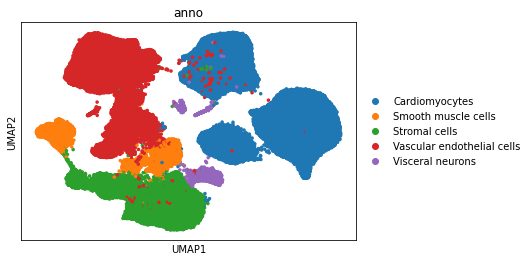

In [ ]:
sc.pl.umap(combined, color=['anno'], legend_loc = 'right margin', size = 50)

In [ ]:
#checkpoint - integrated object with transferred labels with scanVI

os.chdir('/content/drive/MyDrive/jupyterdata/GCA_data/external_data')
combined.write('shendure_teich_combined_scVI.h5ad', compression = 'gzip')
model_combined.save("shendure_teich_model/", overwrite = True)

In [ ]:

***Restart***


In [ ]:
#checkpoint - integrated object with transferred labels with scanVI

os.chdir('/content/drive/MyDrive/jupyterdata/GCA_data/external_data')
combined = sc.read_h5ad('shendure_teich_combined_scVI.h5ad')
model_combined = scvi.model.SCVI.load("shendure_teich_model/", combined, use_gpu=True)

RuntimeError: ignored

In [ ]:
combined.obs['combined'] = combined.obs.source.astype(str) + '_' + combined.obs.anno.astype(str)

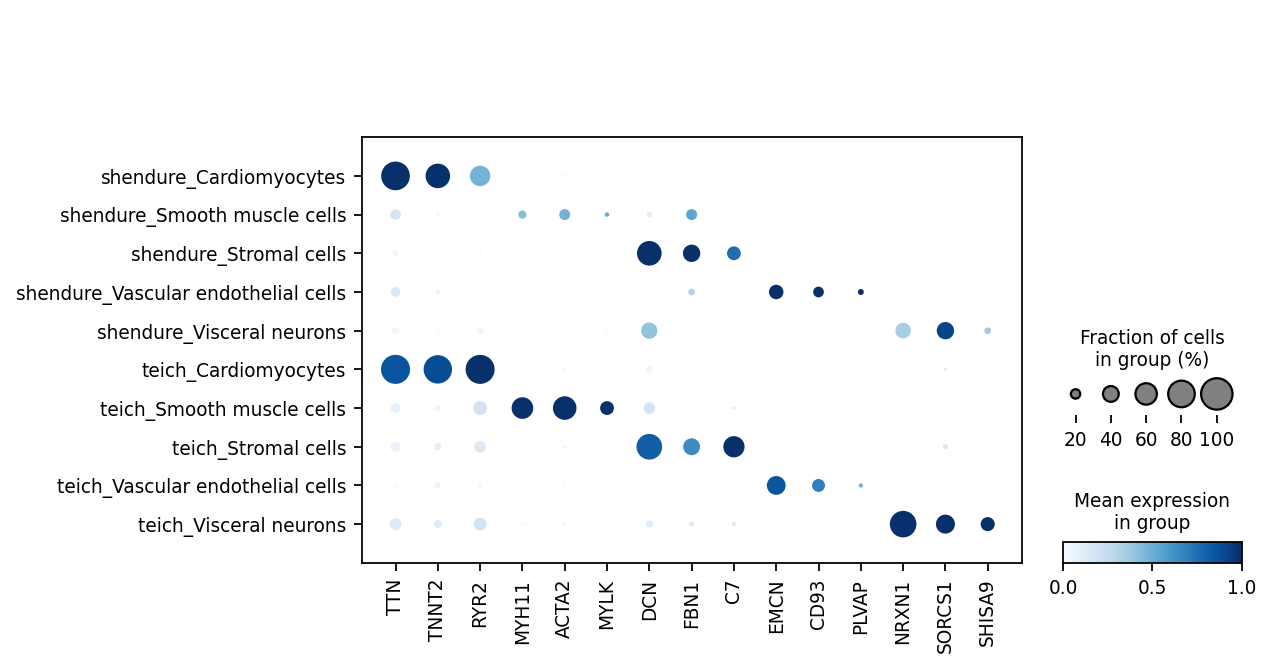

In [ ]:
sc.set_figure_params(scanpy=True, dpi=80, dpi_save=300, fontsize = 10)

os.chdir('/content/drive/MyDrive/jupyterdata/GCA_data/figures')

sc.pl.DotPlot(combined, ['TTN', 'TNNT2', 'RYR2', 
                         'MYH11', 'ACTA2', 'MYLK',
                         'DCN', 'FBN1', 'C7',
                         'EMCN', 'CD93', 'PLVAP',
                         'NRXN1', 'SORCS1', 'SHISA9'

                        ], groupby = 'combined', standard_scale = 'var').style(cmap='Blues', dot_edge_color='white', 
                                                    dot_edge_lw=1).savefig('shendure_teich_markers_dotplot.png')

In [ ]:
de_vsmc_vs = model_combined.differential_expression(adata=combined, groupby='combined', group1='shendure_Smooth muscle cells', group2='teich_Smooth muscle cells')

DE...: 100%|██████████| 1/1 [00:08<00:00,  8.88s/it]


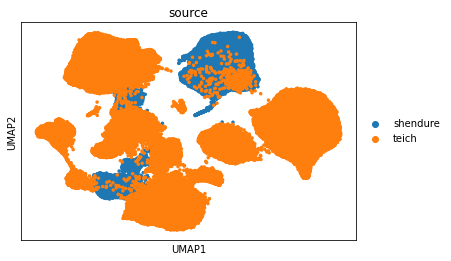

In [ ]:
sc.pl.umap(combined, color=['source'], legend_loc = 'right margin', size = 50)